In [161]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
def scrape_data(url):
    try:
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "html5lib")
        return soup
    except:
        print("Scraping failed.")

In [163]:
soup = scrape_data('https://www.wholesalesolar.com/list-grid-tie-packages')

In [164]:
hardware_components = [element.text for element in soup.find_all('td')]

In [165]:
hardware_components

['1.92 kW Grid Tied Solar System with Enphase IQ7+ Microinverters and 6x Heliene 320w Panels',
 '1895201',
 '1.9 kW',
 '288.0 kWh',
 '6 Heliene 320 Black Mono Panels',
 '6 Enphase IQ7+ Micro Inverters',
 '$3,903.95',
 'heliene',
 'enphase',
 'Solar Sky 2.19 kW Grid Tied Solar System with SMA and 6x Astronergy Solar 365 Panels',
 '1892025',
 '2.2 kW',
 '328.5 kWh',
 '6 Astronergy Solar CHSM6612M-365 Silver Mono PERC Panels',
 '1 SMA Sunny Boy 3.8-US-41 Inverter',
 '$3,997.00',
 'astronergy-solar',
 'sma',
 '2.19 kW Grid Tied Solar System with Enphase IQ7A Microinverters and 6x Astronergy Solar 365w Panels',
 '1895203',
 '2.2 kW',
 '328.5 kWh',
 '6 Astronergy Solar CHSM6612M-365 Silver Mono PERC Panels',
 '6 Enphase IQ7A Micro Inverters',
 '$4,101.95',
 'astronergy-solar',
 'enphase',
 '2.19 kW Grid Tied Solar System with Enphase IQ7A Microinverters and 6x Heliene 365w Panels',
 '1895403',
 '2.2 kW',
 '328.5 kWh',
 '6 Heliene 365 Black Mono Panels',
 '6 Enphase IQ7A Micro Inverters',
 '$

In [166]:
n = 9
packages = [hardware_components[i * n:(i + 1) * n] for i in range((len(hardware_components) + n - 1) // n )]
columns = ['System','SKU','Array Size','Monthly Output','Modules','Inverter','Price','MOD OEM',' INV OEM']
df = pd.DataFrame(packages,columns=columns)

In [183]:
df.sample(15)

,System,SKU,Array Size,Monthly Output,Modules,Inverter,Price,MOD OEM,INV OEM,Number of Modules,Number of Invs,Nameplate Rating,Nameplate,DC Ratio
96,11.68 kW Grid Tied Solar System with Enphase I...,1894342,11.7,1752.0,32 Astronergy Solar CHSM6612M-365 Silver Mono ...,32 Enphase IQ7A Micro Inverters,17757.30,astronergy-solar,enphase,32,32.0,"[32, Astronergy, Solar, CHSM6612M-365, Silver,...",365,1.0
27,4.38 kW Grid Tied Solar System with Enphase IQ...,1894302,4.4,657.0,12 Astronergy Solar CHSM6612M-365 Silver Mono ...,12 Enphase IQ7A Micro Inverters,7263.40,astronergy-solar,enphase,12,12.0,"[12, Astronergy, Solar, CHSM6612M-365, Silver,...",365,1.0
93,12.8 kW Grid Tied Solar System with SolarEdge ...,1890531,12.8,1920.0,40 Astronergy Solar CHSM60M-HC-320 Silver Mono...,1 SolarEdge SE10000H HD-Wave SetApp Enabled In...,17403.00,astronergy-solar,solaredge,40,1.0,"[40, Astronergy, Solar, CHSM60M-HC-320, Silver...",320,40.0
55,7.68 kW Grid Tied Solar System with SolarEdge ...,1890515,7.7,1152.0,24 Astronergy Solar CHSM60M-HC-320 Silver Mono...,1 SolarEdge SE7600H HD-Wave SetApp Enabled Inv...,11086.00,astronergy-solar,solaredge,24,1.0,"[24, Astronergy, Solar, CHSM60M-HC-320, Silver...",320,24.0
140,23.04 kW Grid Tied Solar System with SolarEdge...,1892223,23.0,3456.0,72 Heliene 320 Black Mono Panels,2 SolarEdge SE10000H HD-Wave SetApp Enabled In...,34883.00,heliene,solaredge,72,2.0,"[72, Heliene, 320, Black, Mono, Panels]",320,36.0
144,25.6 kW Grid Tied Solar System with SolarEdge ...,1892241,25.6,3840.0,80 Heliene 320 Black Mono Panels,4 SolarEdge SE6000H HD-Wave SetApp Enabled Inv...,40129.00,heliene,solaredge,80,4.0,"[80, Heliene, 320, Black, Mono, Panels]",320,20.0
48,Solar Sky 7.3 kW Grid Tied Solar System with S...,1892013,7.3,1095.0,20 Astronergy Solar CHSM6612M-365 Silver Mono ...,1 SMA Sunny Boy 7.7-US-41 Inverter,9784.00,astronergy-solar,sma,20,1.0,"[20, Astronergy, Solar, CHSM6612M-365, Silver,...",365,20.0
57,SMA 7.68 kW Grid Tied Solar System with SMA In...,1892408,7.7,1152.0,24 Heliene 320 Black Mono Panels,1 SMA Sunny Boy 7.7-US-41 Inverter,11188.00,heliene,sma,24,1.0,"[24, Heliene, 320, Black, Mono, Panels]",320,24.0
74,9.6 kW Grid Tied Solar System with SolarEdge a...,1894219,9.6,1440.0,30 Heliene 320 Black Mono Panels,1 SolarEdge SE7600H HD-Wave SetApp Enabled Inv...,14629.00,heliene,solaredge,30,1.0,"[30, Heliene, 320, Black, Mono, Panels]",320,30.0
61,7.3 kW Grid Tied Solar System with Enphase IQ7...,1894419,7.3,1095.0,20 Heliene 365 Black Mono Panels,20 Enphase IQ7A Micro Inverters,12067.40,heliene,enphase,20,20.0,"[20, Heliene, 365, Black, Mono, Panels]",365,1.0


In [168]:
df['Array Size'] = df['Array Size'].str.split().str.get(0).astype(float)

In [169]:
df['Monthly Output'] = df['Monthly Output'].str.split().str.get(0).astype(float)

In [170]:
df['Price'] = df['Price'].str.replace('$','').str.split().apply(lambda x: float(x[0].replace(',', '')))

In [171]:
df['Number of Modules'] = df['Modules'].str.split().str.get(0).astype(int)

In [173]:
df['Number of Invs'] = df['Inverter'].str.split().str.get(0).dropna().astype(int)

In [174]:
df['Nameplate Rating'] = df['Modules'].str.split()

In [175]:
def extract_numeric_value(col):
    if 'Heliene' in col:
        value = col[2]
        return value
    else:
        model_information = col[3]
        watt_capacity = model_information.split('-')[-1]
        return watt_capacity

In [176]:
df['Nameplate'] = df['Nameplate Rating'].apply(extract_numeric_value).astype(int)

In [177]:
df['Nameplate']

0      320
1      365
2      365
3      365
4      320
      ... 
146    365
147    365
148    365
149    320
150    320
Name: Nameplate, Length: 151, dtype: int64

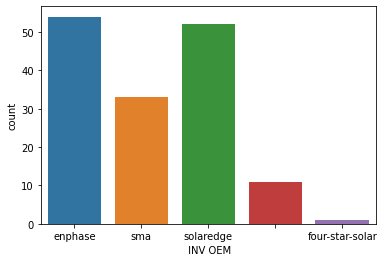

In [178]:
sns.countplot(x=df[' INV OEM'])

In [179]:
sma = df[df[' INV OEM'] == 'sma']

In [181]:
df['DC Ratio'] = df['Number of Modules'] // df['Number of Invs']

/Users/toddhendricks/miniconda3/envs/metis/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/toddhendricks/miniconda3/envs/metis/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([54.,  9., 12., 28., 13., 11.,  3.,  8.,  0.,  1.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <a list of 10 Patch objects>)

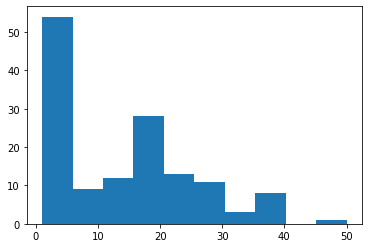

In [182]:
plt.hist(x=df['DC Ratio'])